In [3]:
import io
import networkx as nx
import matplotlib.pyplot as plt
import random
from datetime import datetime
import numpy as np
import statistics
import colorsys  #Included to modify the colors of the partitions
import copy

NODES = ["Jana Carles", "Cesca Vidal", "Roger Morera", "Roger Solà", "Cèlia Carles", "Guillem Ordi","Mila Cuadras","Bartomeu Enrich","Jacob Sandiumenge", "Pau Vives","Quim Cirera","Maricel Forn","Eulàlia Grané","David Valls","Joan Trullàs","Marc Grané","Nil Vives","Anna Pauné","Sergi Ger", "Laia Pla"]

# Read the graph in GraphML format
Data = open('rel.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.DiGraph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype,
                      nodetype=str)
# Re-label the nodes so they use the 'name' as label

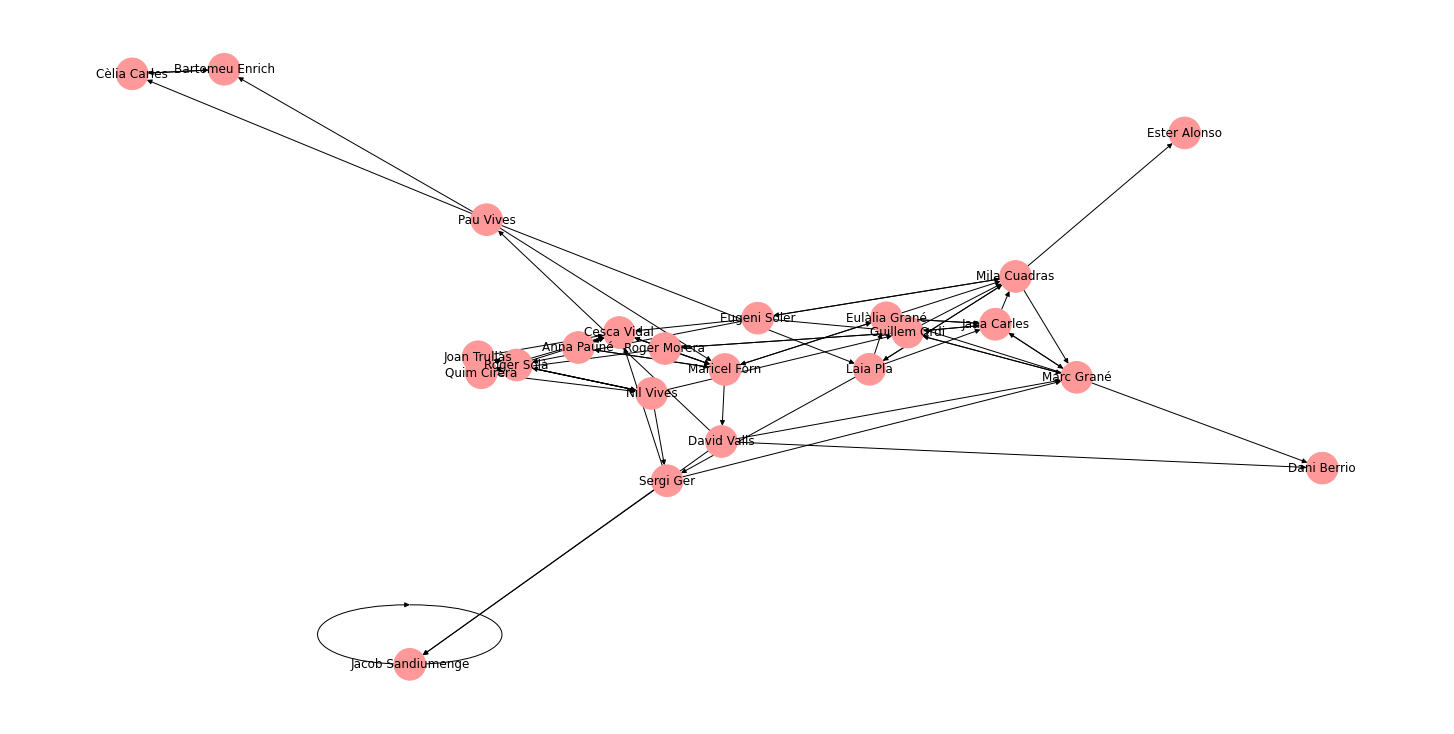

In [4]:

def plot_graph(g, width=20, height=10, font_size=12, partition=None):
    # Create a plot of width x height
    plt.figure(figsize=(width, height))

    # Colors
    if partition is None:
        partition = [ set(g.nodes()) ]
        
    num_parts = len(partition)
    
    node_to_color = {}
    h = 0
    part_color = colorsys.hsv_to_rgb(h, 0.4, 1) # Gets a first color of red 
    for part in partition:
        for node in part:
            node_to_color[node] = part_color
        h += 1.0/num_parts   # Increments the hue of the color 
        part_color = colorsys.hsv_to_rgb(h, 0.4, 1) # Gets colors all around the color wheel
       
    colors = []
    for node in g.nodes():
        colors.append(node_to_color[node])
        
    # Layout the nodes using a spring model
    nx.draw_spring(g, with_labels=True, node_size=1000, font_size=font_size,
                   cmap=plt.get_cmap('YlOrRd'), node_color=colors)

    # Display
    plt.show()
    
plot_graph(G)

In [11]:
def satisfies(pairs):
    if pairs == []:
        return False
    for p in pairs:
        if p not in G.edges():
            return False 
    return True

def score(pairs):
    s=0
    for [u,v] in pairs:
        if (u,v) not in G.edges():
            s = s+1
        if (v,u) not in G.edges():
            s = s+1
    return s

def makePairs(k):
    (dt, micro) = datetime.utcnow().strftime('%Y%m%d%H%M%S.%f').split('.')
    s = "%s%03d" % (dt, int(micro) / 1000)
    random.seed(s)
    i = 0
    best_pair = []
    m = 1000
    
    while not satisfies(best_pair) and i<100000:
        pairs = []
        selected_nodes = []
        unselected = copy.copy(NODES)
        
        while len(selected_nodes) < len(NODES) and score(pairs) < m:
            selected = random.choice(unselected)
            unselected.remove(selected)
            best_match = random.choice(unselected)
            best_score = score([[selected, best_match]])
            for match in unselected:
                if score([[selected,match]]) < best_score:
                    best_match = match
                    best_score = score([[selected, best_match]])
                if best_score == 0:
                    break
            unselected.remove(best_match)
            selected_nodes.append(selected)
            selected_nodes.append(best_match)
            pairs.append([selected, best_match])
            
        if score(pairs) < m:
            best_pair = pairs
            m = score(best_pair)
        i = i+1
        
    return best_pair

In [12]:
Ideal = makePairs(2)
Insatisfets = []
i = 1
for p in Ideal:
    if p not in G.edges():
        Insatisfets.append(p[0])
    if (p[1],p[0]) not in G.edges():
        Insatisfets.append(p[1])
        
    print("Equip " + str(i) + ": " + p[0] + " i " + p[1])
    i += 1
print("\nINSATISFETS:" + str(len(Insatisfets)))
for i in Insatisfets:
    print(i)
    

Equip 1: Pau Vives i David Valls
Equip 2: Roger Solà i Quim Cirera
Equip 3: Jacob Sandiumenge i Sergi Ger
Equip 4: Roger Morera i Guillem Ordi
Equip 5: Mila Cuadras i Laia Pla
Equip 6: Joan Trullàs i Nil Vives
Equip 7: Marc Grané i Jana Carles
Equip 8: Anna Pauné i Cesca Vidal
Equip 9: Bartomeu Enrich i Cèlia Carles
Equip 10: Eulàlia Grané i Maricel Forn

INSATISFETS:2
Pau Vives
Jacob Sandiumenge
